In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10041922993227218584
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10062135296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8611355803225696379
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:05:00.0, compute capability: 8.6"
]


In [2]:
df_train = pd.read_csv("train.csv") # 학습용 데이터
df_test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

In [3]:
df_train.head() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [4]:
df_train.corr(method ='spearman')

,bant_submit,com_reg_ver_win_rate,customer_idx,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner,is_converted
bant_submit,1.000000,-0.198787,-0.116748,-0.256203,NaN,NaN,NaN,0.131076,0.099961,0.131491,0.057462,-0.096773,-0.073586,-0.001901
com_reg_ver_win_rate,-0.198787,1.000000,0.007027,-0.141521,NaN,NaN,NaN,-0.067391,0.007416,0.205356,-0.099736,0.581987,0.439329,0.258720
customer_idx,-0.116748,0.007027,1.000000,0.412366,NaN,NaN,NaN,-0.028739,-0.041689,-0.052699,-0.010295,0.001263,-0.064112,-0.063505
historical_existing_cnt,-0.256203,-0.141521,0.412366,1.000000,NaN,NaN,NaN,0.061957,-0.080806,-0.055832,0.187255,0.027644,-0.064339,-0.121608
id_strategic_ver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
it_strategic_ver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idit_strategic_ver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_desc_length,0.131076,-0.067391,-0.028739,0.061957,NaN,NaN,NaN,1.000000,0.118631,0.170724,0.010662,-0.029420,-0.006729,0.162536
ver_cus,0.099961,0.007416,-0.041689,-0.080806,NaN,NaN,NaN,0.118631,1.000000,0.267136,0.317743,0.017758,0.024370,0.063554
ver_pro,0.131491,0.205356,-0.052699,-0.055832,NaN,NaN,NaN,0.170724,0.267136,1.000000,0.440126,0.341671,0.081166,0.008846


In [5]:
df_train.corr(method ='pearson')

,bant_submit,com_reg_ver_win_rate,customer_idx,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner,is_converted
bant_submit,1.000000,-0.358328,-0.103236,-0.201929,NaN,NaN,NaN,0.117897,0.100217,0.131256,0.091302,-0.059189,-0.136132,-0.002480
com_reg_ver_win_rate,-0.358328,1.000000,-0.001035,-0.084781,NaN,NaN,NaN,-0.103671,-0.085479,-0.077734,-0.258941,0.446932,0.421827,0.342590
customer_idx,-0.103236,-0.001035,1.000000,0.129121,NaN,NaN,NaN,-0.047099,-0.037796,-0.048979,-0.017452,0.005820,-0.040203,-0.056425
historical_existing_cnt,-0.201929,-0.084781,0.129121,1.000000,NaN,NaN,NaN,0.023398,-0.014322,0.021884,0.078515,0.000799,0.192473,-0.004490
id_strategic_ver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
it_strategic_ver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idit_strategic_ver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_desc_length,0.117897,-0.103671,-0.047099,0.023398,NaN,NaN,NaN,1.000000,0.092316,0.113362,0.021274,-0.005736,0.039366,0.112822
ver_cus,0.100217,-0.085479,-0.037796,-0.014322,NaN,NaN,NaN,0.092316,1.000000,0.267136,0.278570,-0.025838,0.005361,0.063554
ver_pro,0.131256,-0.077734,-0.048979,0.021884,NaN,NaN,NaN,0.113362,0.267136,1.000000,0.404961,0.175815,0.010284,0.008846


In [6]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [7]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

In [8]:
# is_converted를 1과0으로 바꾸기
def convert_is_converted(is_converted):
    if is_converted :
        return 1
    else:
        return 0

df_train["is_converted"] = list(map(convert_is_converted, df_train["is_converted"]))

In [9]:
df_train.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,1
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,1
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,1
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,1
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,1


In [10]:
# 수치형 데이터들의 레이블
label_numerical_columns = [
    "bant_submit",
    "com_reg_ver_win_rate",
    "customer_idx",
    "historical_existing_cnt",
    "id_strategic_ver",
    "it_strategic_ver",
    "idit_strategic_ver",
    "lead_desc_length",
    "ver_cus",
    "ver_pro",
    "ver_win_rate_x",
    "ver_win_ratio_per_bu",
    "lead_owner",
    "is_converted"
]

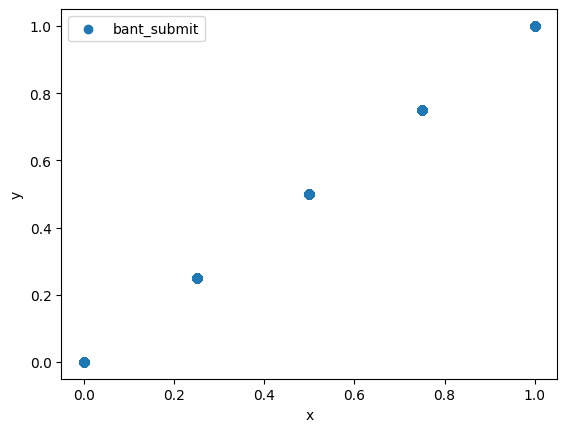

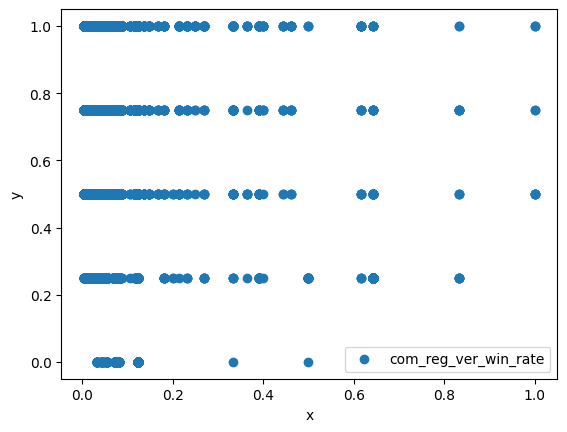

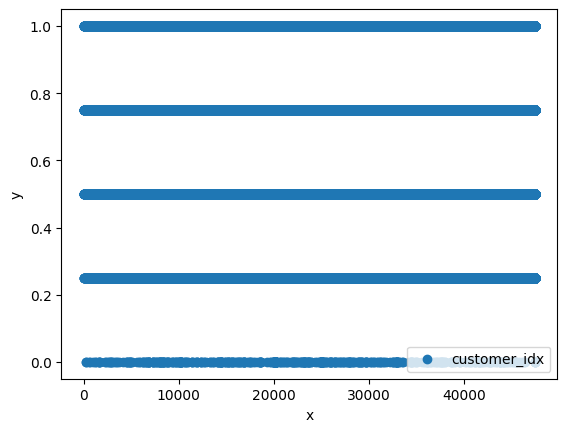

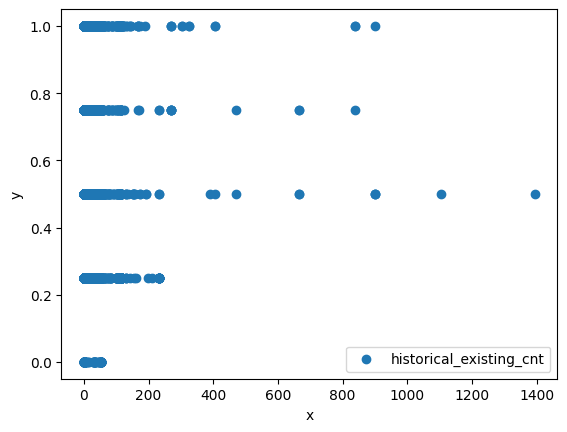

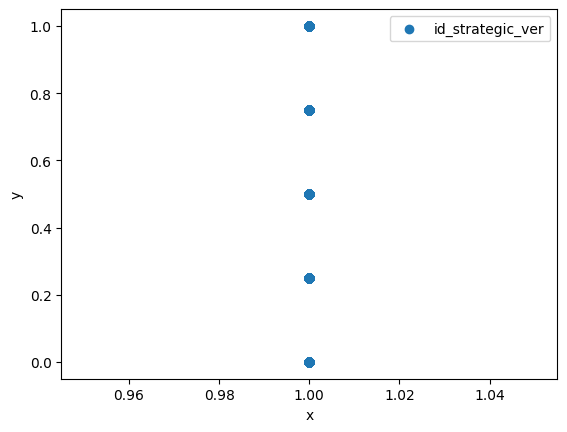

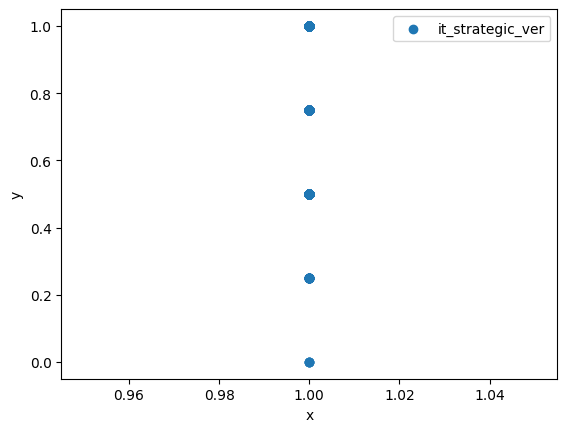

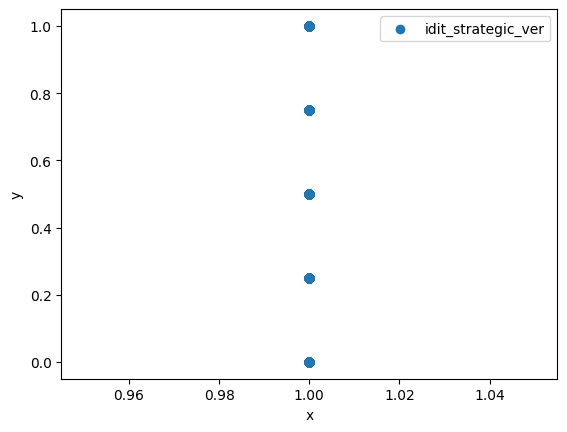

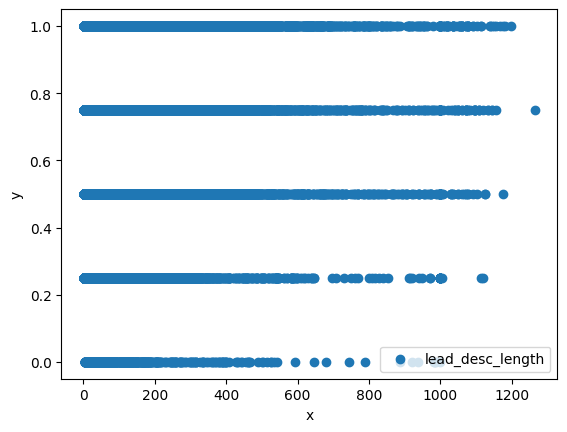

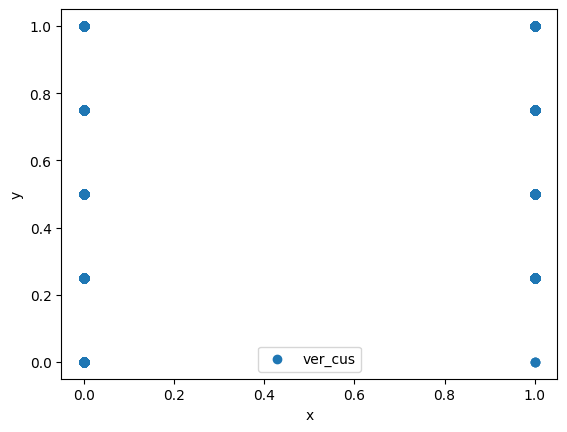

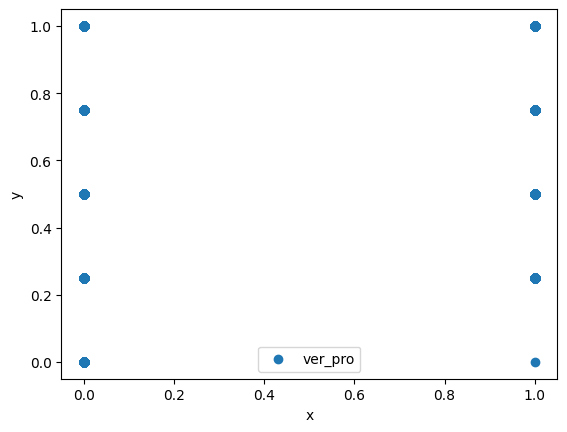

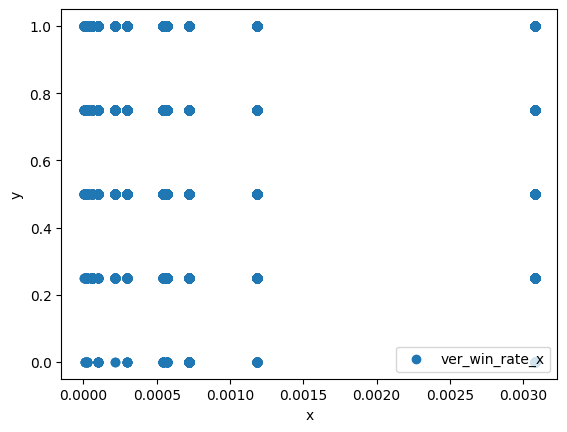

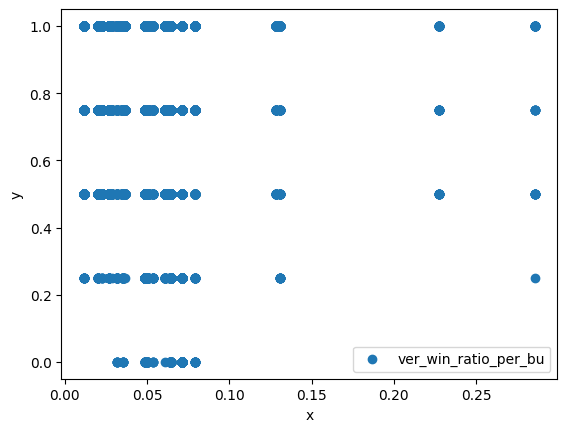

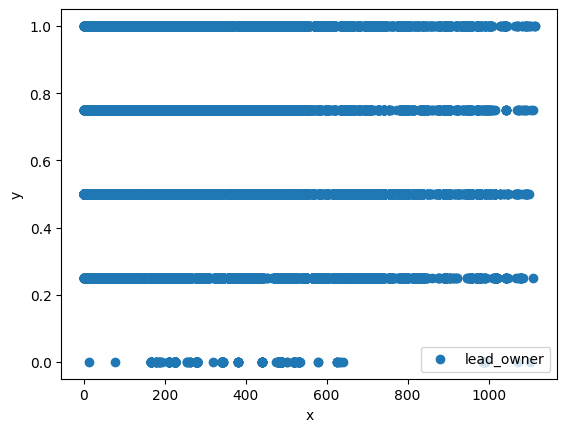

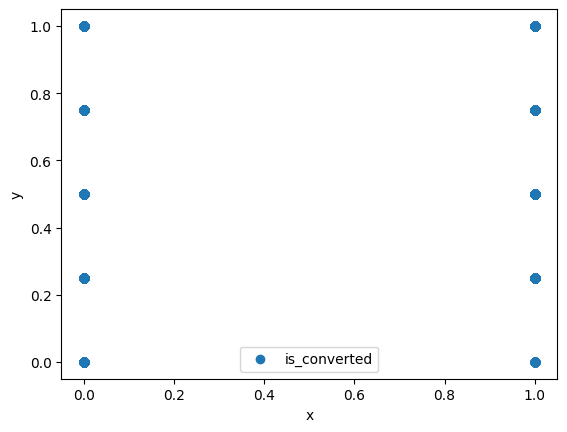

In [12]:

# 레이블별 산점도 그리기
for label in label_numerical_columns:# x, y 값 추출
  x = df_train[label]
  y = df_train["bant_submit"]

  # 산점도 그리기
  plt.scatter(x, y, label=label)
  # 범례 표시
  plt.legend()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()